<a href="https://colab.research.google.com/github/Anya-ova/pytorch_classifier/blob/main/pytorchClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5),  # mean
               (0.5, 0.5, 0.5))] # std. deviation
)

In [3]:
training_data = CIFAR10(root="./data",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

100%|██████████| 170498071/170498071 [00:13<00:00, 12788941.33it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


100%|██████████| 170498071/170498071 [00:13<00:00, 12788647.67it/s]


Extracting cifar/cifar-10-python.tar.gz to cifar


In [47]:
batch_size = 32
train_dataloader = DataLoader(training_data, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_data, 
                             batch_size=batch_size, 
                             shuffle=True)

In [48]:
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([32, 3, 32, 32])
Shape of y: torch.Size([32]) torch.int64


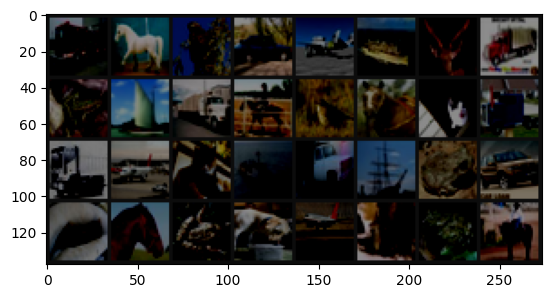

truck horse bird  automobile airplane ship  deer  truck frog  ship  truck horse bird  horse cat   truck truck airplane cat   ship  truck ship  frog  automobile cat   horse frog  dog   airplane deer  frog  horse


In [49]:
def imshow(img):
  img = img / 2 + .05 # revert normalization for viewing
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
classes = training_data.classes
training_data.classes

dataiter = iter(train_dataloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [51]:
import torch.nn.functional as F

In [52]:
import torch.nn as nn

In [53]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d((2,2))
        self.conv2 = nn.Conv2d(6,16,5) 
        self.fc1 = nn.Linear(16*5*5, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
       x = self.pool(F.relu(self.conv1(x)))
       x = self.pool(F.relu(self.conv2(x)))
       x = torch.flatten(x, 1)
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
        
model = Net()
model.to(device)
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [54]:
import torch.optim as optim


In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr=0.001, momentum=0.9 ) # momentum=0.9

In [56]:
for epoch in range(10):
    size = len(train_dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 2.306846  [    0/50000]
loss: 1.915740  [    0/50000]
loss: 1.673774  [    0/50000]
loss: 1.467417  [    0/50000]
loss: 1.179208  [    0/50000]
loss: 1.804216  [    0/50000]
loss: 1.234470  [    0/50000]
loss: 1.393675  [    0/50000]
loss: 1.229787  [    0/50000]
loss: 0.929876  [    0/50000]


In [57]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [17]:
# def test(dataloader, model, loss_fn):
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     model.eval()
#     test_loss, correct = 0, 0
#     with torch.no_grad():
#         for X, y in dataloader:
#             X, y = X.to(device), y.to(device)
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()
#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [18]:
# epochs = 10
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train(train_dataloader, model, loss_fn, optimizer)
#     test(test_dataloader, model, loss_fn)
# print("Done!")

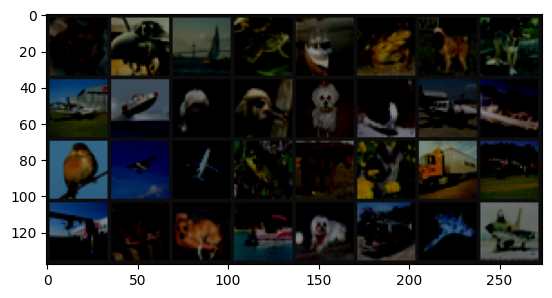

Ground Truth:  dog   airplane ship  frog 


In [58]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
imshow(make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [59]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  frog  horse ship  frog 


In [60]:
correct = 0
total = 0
with torch.no_grad():
   for data in test_dataloader:
     images, labels = data
     outputs = model(images.cuda())
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels.cuda()).sum().item()
     
print(f'Model accuracy: {100 * correct // total} %')

Model accuracy: 62 %


In [61]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0  for classname in classes}
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    outputs = model(images.cuda())
    _, predictions = torch.max(outputs, 1)
    for label,prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class {classname:5s}: {accuracy:.1f}%')

Accuracy for class airplane: 72.3%
Accuracy for class automobile: 69.6%
Accuracy for class bird : 47.0%
Accuracy for class cat  : 47.8%
Accuracy for class deer : 48.7%
Accuracy for class dog  : 45.3%
Accuracy for class frog : 73.8%
Accuracy for class horse: 74.8%
Accuracy for class ship : 72.6%
Accuracy for class truck: 76.4%
